# Working with collections and object selections

- RDataFrame reads collections as the special type [ROOT::RVec](https://root.cern/doc/master/classROOT_1_1VecOps_1_1RVec.html) - e.g. a branch containing an array of floating point numbers can be read as a `ROOT::RVec<float>`.

- C-style arrays (with variable or static size), `std::vectors` and many other collection types can be read this way. 

- When reading ROOT data, column values of type `ROOT::RVec<T>` perform no copy of the underlying array.

- `RVec` is a container similar to `std::vector` (and can be used just like a `std::vector`) but it also offers a rich interface to operate on the array elements in a vectorised fashion, similarly to Python's NumPy arrays.

In [1]:
import ROOT

treename = "myDataset"
filename = "../../data/collections_dataset.root"
df = ROOT.RDataFrame(treename, filename)

print(f"Columns in the dataset: {df.GetColumnNames()}")

Welcome to JupyROOT 6.30/04
Columns in the dataset: { "E", "nPart", "px", "py" }


To quickly inspect the data we can export it as a dictionary of `numpy` arrays thanks to the `AsNumpy` RDataFrame method. 

Note that for each row, `E` is an array of values:

In [2]:
npy_dict = df.AsNumpy(["E"])

for row, vec in enumerate(npy_dict["E"]):
    print(f"\nRow {row} contains:\n{vec}")


Row 0 contains:
{ 130000.01, 0.93827999, 0.93957090, 0.93957090, 0.93827999, 0.93957090, 0.93827999, 0.93957090, 0.93957090, 0.93827999, 0.93957090, 0.93827999, 0.93827999, 0.94612722, 0.94297180, 106159.91, 15555.974, 6246.4774, 782.95749, 1078.1841, 156.45323, 19.615241, 11711.961, 3844.0119, 308.88227, 474.07518, 868.16056, 210.02367, 142.94919, 13.504043, 13.399446, 2.8028640, 3.4129314, 258.32027, 215.75487, 58.913799, 809.24677, 2.5890092, 0.21385537, 9.3892520 }

Row 1 contains:
{ 130000.01, 0.93957090, 0.93827999, 0.93957090, 0.93957090, 0.93827999, 0.93827999, 0.93957090, 0.93827999, 0.93827999, 0.93957090, 0.93957090, 0.93827999, 0.94332697, 0.95194039, 0.94053839, 0.94349328, 0.93838184, 0.94539411, 0.93998250, 122217.22, 7395.7245, 2.1671104, 5.9762938, 61.247334, 84.256846, 202.08447, 28.955872, 74804.566, 47412.649, 3880.0412, 987.79319, 2527.8902, 1.3687218, 0.79838852, 1.2935306, 1.5876441, 3.0951194, 9.1041150, 75.152736, 21981.881, 25430.768, 3265.6709, 614.37035, 97

### Define a new column with operations on RVecs

In [3]:
df1 = df.Define("good_pt", "sqrt(px*px + py*py)[E>100]")

`sqrt(px*px + py*py)[E>100]`:
- `px`, `py` and `E` are the columns, the elements of those columns are `RVec`s

- Operations on `RVec`s, such as sum, product, sqrt, preserve the dimensionality of the array

- `[E>100]` selects the elements of the array that satisfy the condition

- `E > 100`: boolean expressions on `RVec`s such as `E > 100` return a mask, that is an array with information which values pass the selection (e.g. `[0, 1, 0, 0]` if only the second element satisfies the condition)

### Now we can plot the newly defined column values in a histogram

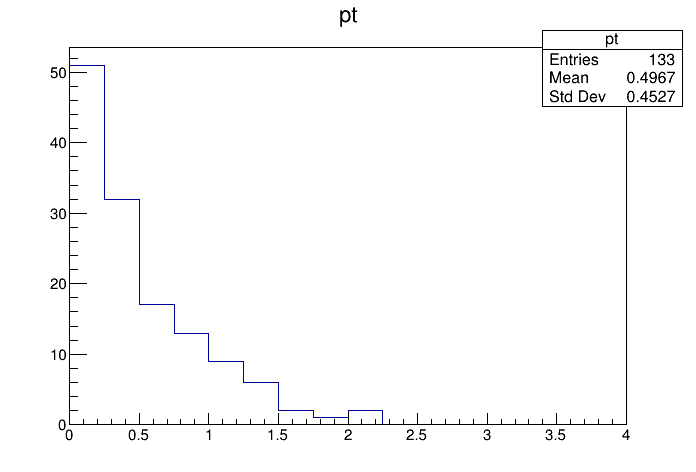

In [4]:
c = ROOT.TCanvas()
h = df1.Histo1D(("pt", "pt", 16, 0, 4), "good_pt")
h.Draw()
c.Draw()